In [ ]:
!python3 -m pip install paddlepaddle-gpu

In [ ]:
!pip install "paddleocr>=2.0.1"


In [ ]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='fr') # need to run only once to download and load model into memory


/usr/local/lib/python3.10/dist-packages/paddle/fluid/framework.py:549: UserWarning: You are using GPU version Paddle, but your CUDA device is not set properly. CPU device will be used by default.
  warnings.warn(


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:16<00:00, 249kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/latin_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer/latin_PP-OCRv3_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:17<00:00, 567kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:15<00:00, 145kiB/s]

[2023/12/20 15:46:23] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_p

ValueError: ignored

In [ ]:
from google.colab.patches import cv2_imshow
import cv2


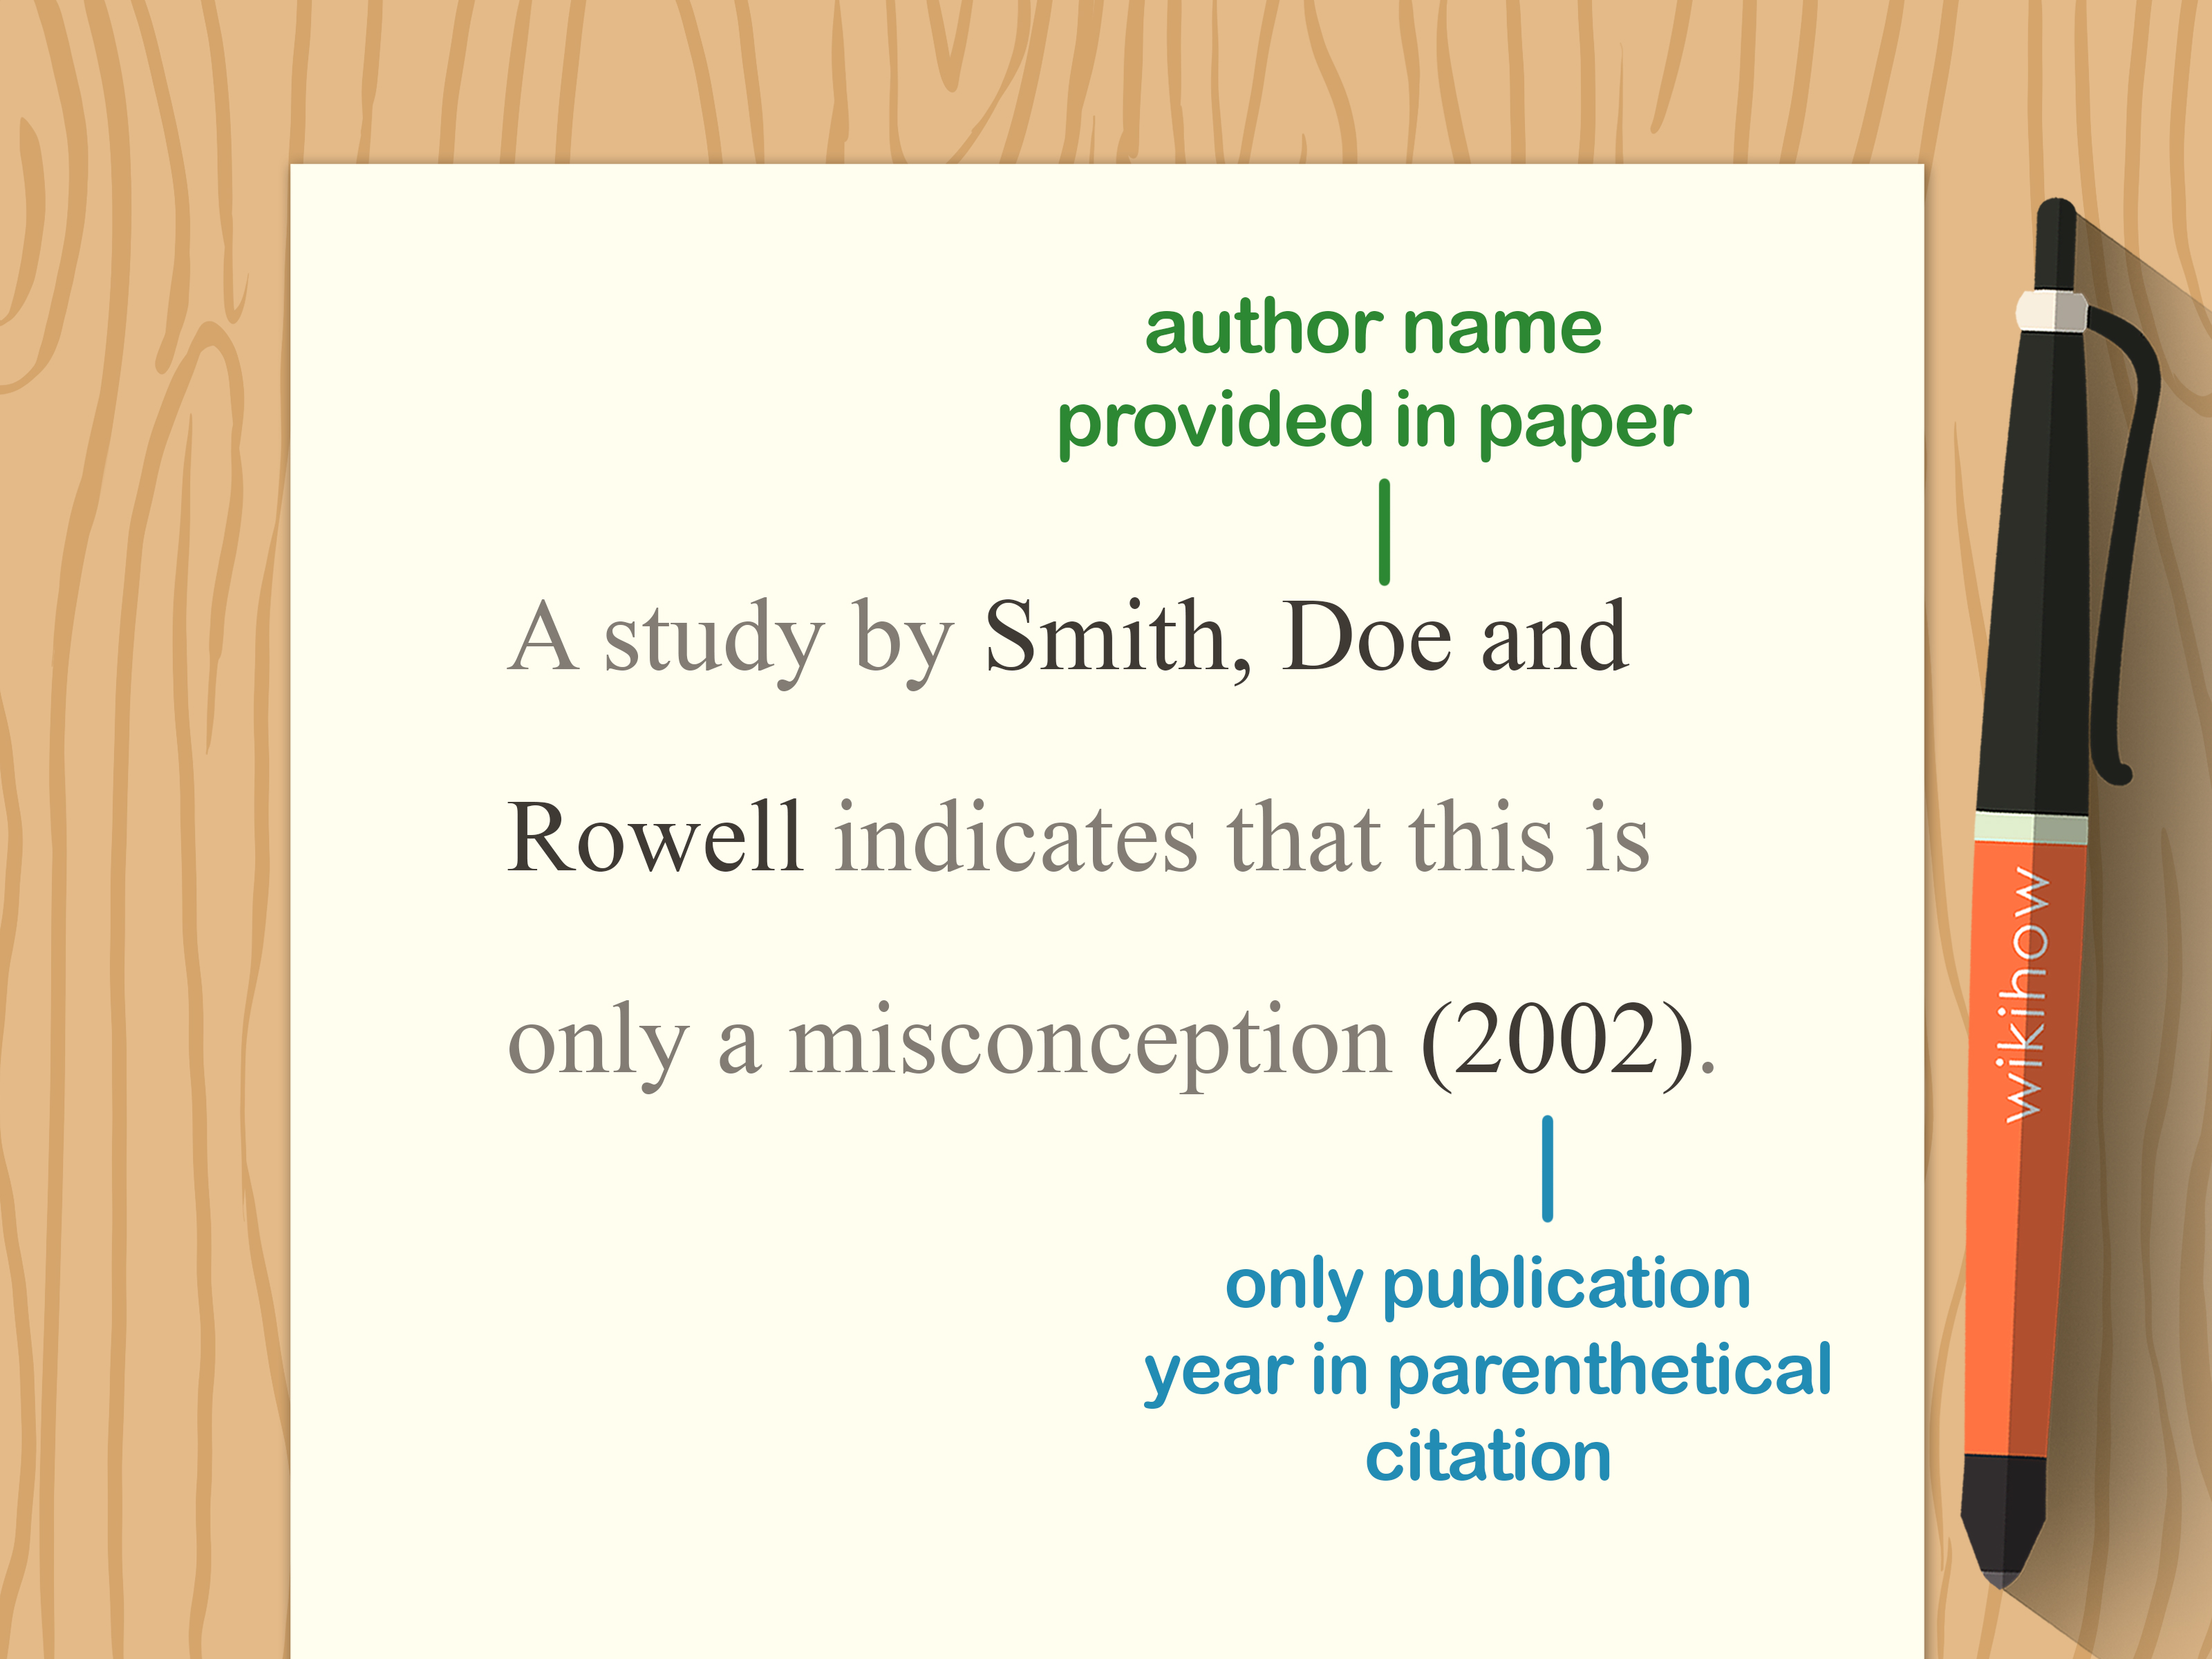

In [ ]:
img_path = '/content/ca.png'

img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `french`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en',use_gpu=False) # need to run only once to download and load model into memory
img_path = '/content/ca.png'
result = ocr.ocr(img_path, cls=True)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

# draw result
from PIL import Image
result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
drop_score=0.5
font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf'
im_show = draw_ocr(image, boxes, txts, scores, drop_score=0.5, font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:18<00:00, 562kiB/s] 


[2023/12/20 15:56:41] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

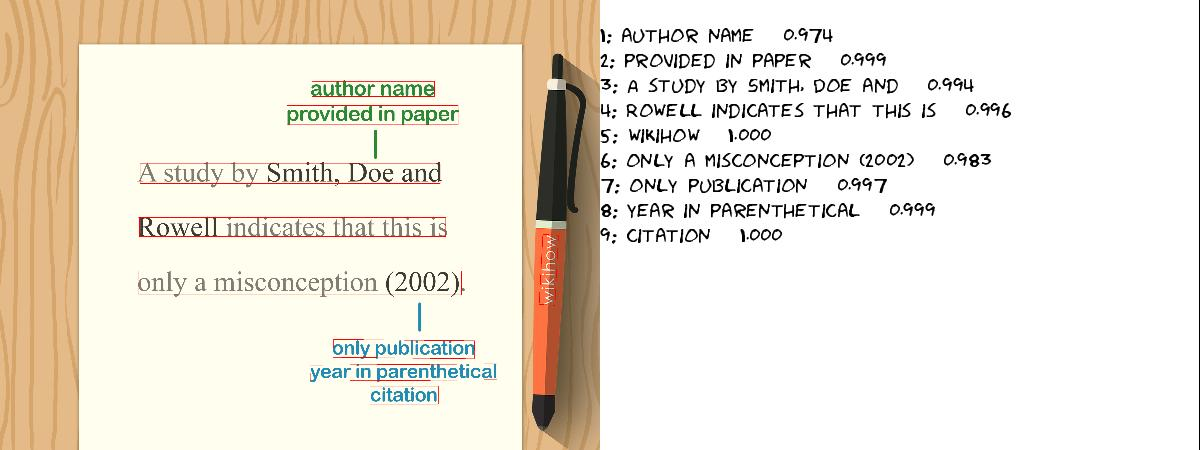

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/result.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `french`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='ar',use_gpu=False) # need to run only once to download and load model into memory
img_path = '/content/arafran.png'
result1 = ocr.ocr(img_path, cls=True)
for idx in range(len(result1)):
    res = result1[idx]
    for line in res:
        print(line)

# draw result
from PIL import Image
result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result1]
txts = [line[1][0] for line in result1]
scores = [line[1][1] for line in result1]
drop_score=0.5
font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf'
im_show = draw_ocr(image, boxes, txts, scores, drop_score=0.5, font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result1.jpg')

AssertionError: ignored

In [25]:
import os
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# For English
ocr_en = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=False)

# For Arabic
ocr_ar = PaddleOCR(use_angle_cls=True, lang='ar', use_gpu=False)

img_path = '/content/arafran.png'

# English OCR
result_en = ocr_en.ocr(img_path, cls=True)

# Arabic OCR
result_ar = ocr_ar.ocr(img_path, cls=True)

# Display English results
print("English OCR results:")
for idx in range(len(result_en)):
    res = result_en[idx]
    for line in res:
        print(line)

# Display Arabic results
print("\nArabic OCR results:")
for idx in range(len(result_ar)):
    res = result_ar[idx]
    for line in res:
        print(line)

# Draw result for English
image = Image.open(img_path).convert('RGB')
boxes_en = [line[0] for line in result_en[0]]
txts_en = [line[1][0] for line in result_en[0]]
scores_en = [line[1][1] for line in result_en[0]]
im_show_en = draw_ocr(image, boxes_en, txts_en, scores_en, drop_score=0.5, font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf')
im_show_en = Image.fromarray(im_show_en)
im_show_en.save('result_en.jpg')

# Draw result for Arabic
boxes_ar = [line[0] for line in result_ar[0]]
txts_ar = [line[1][0] for line in result_ar[0]]
scores_ar = [line[1][1] for line in result_ar[0]]
im_show_ar = draw_ocr(image, boxes_ar, txts_ar, scores_ar, drop_score=0.5, font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf')
im_show_ar = Image.fromarray(im_show_ar)
im_show_ar.save('result_ar.jpg')


[2023/12/20 17:06:11] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [29]:
pip install arabic-reshaper python-bidi


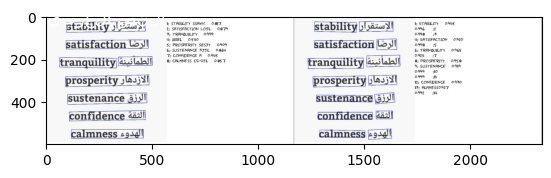

In [31]:
import cv2
import numpy as np
from PIL import Image
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
from google.colab.patches import cv2_imshow

# Load images
img_en = cv2.imread('/content/result_en.jpg', cv2.IMREAD_UNCHANGED)
img_ar = cv2.imread('/content/result_ar.jpg', cv2.IMREAD_UNCHANGED)

# Display images side by side
img_combined = Image.fromarray(cv2.hconcat([img_en, img_ar]))

# Convert PIL Image to NumPy array
img_combined_np = np.asarray(img_combined)

# Arabic text
arabic_text = "النص العربي"  # Replace with your Arabic text

# Reshape and display Arabic text
reshaped_text = arabic_reshaper.reshape(arabic_text)
display_text = get_display(reshaped_text)
cv2.putText(img_combined_np, display_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

# Display the combined image
cv2_imshow(img_combined_np)



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

# Load images
img_en = cv2.imread('/content/result_en.jpg', cv2.IMREAD_UNCHANGED)
img_ar = cv2.imread('/content/result_ar.jpg', cv2.IMREAD_UNCHANGED)

# Display images side by side
img_combined = Image.fromarray(cv2.hconcat([img_en, img_ar]))
cv2_imshow(img_combined)

AttributeError: ignored

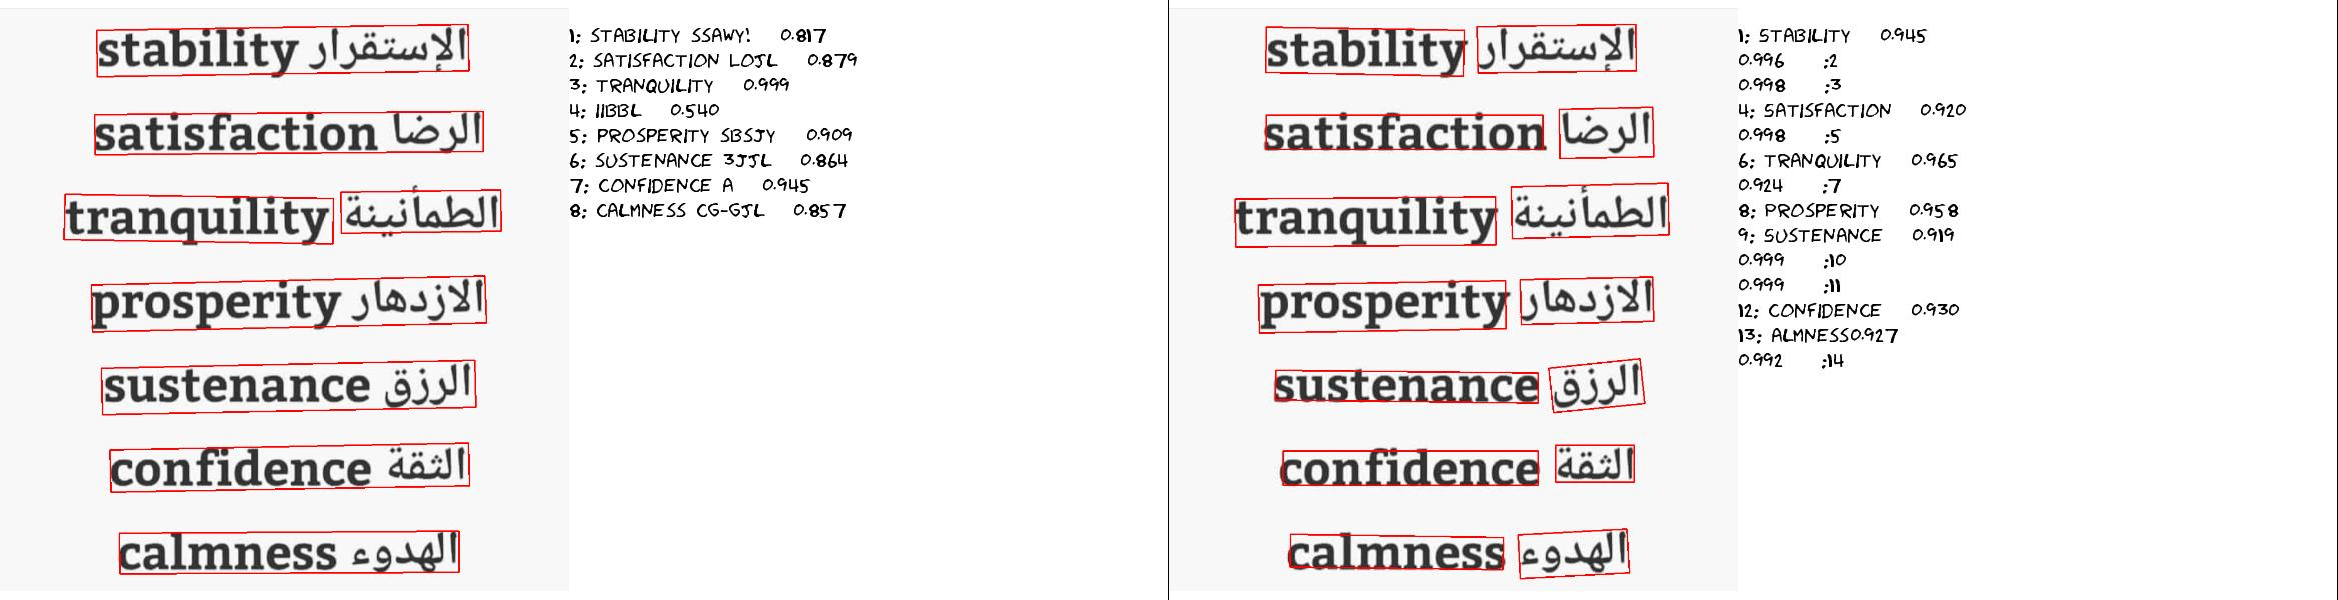

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image

# Load images
img_en = cv2.imread('/content/result_en.jpg', cv2.IMREAD_UNCHANGED)
img_ar = cv2.imread('/content/result_ar.jpg', cv2.IMREAD_UNCHANGED)

# Display images side by side
img_combined = Image.fromarray(cv2.hconcat([img_en, img_ar]))

# Convert PIL Image to NumPy array
img_combined_np = np.asarray(img_combined)

# Display the combined image
cv2_imshow(img_combined_np)


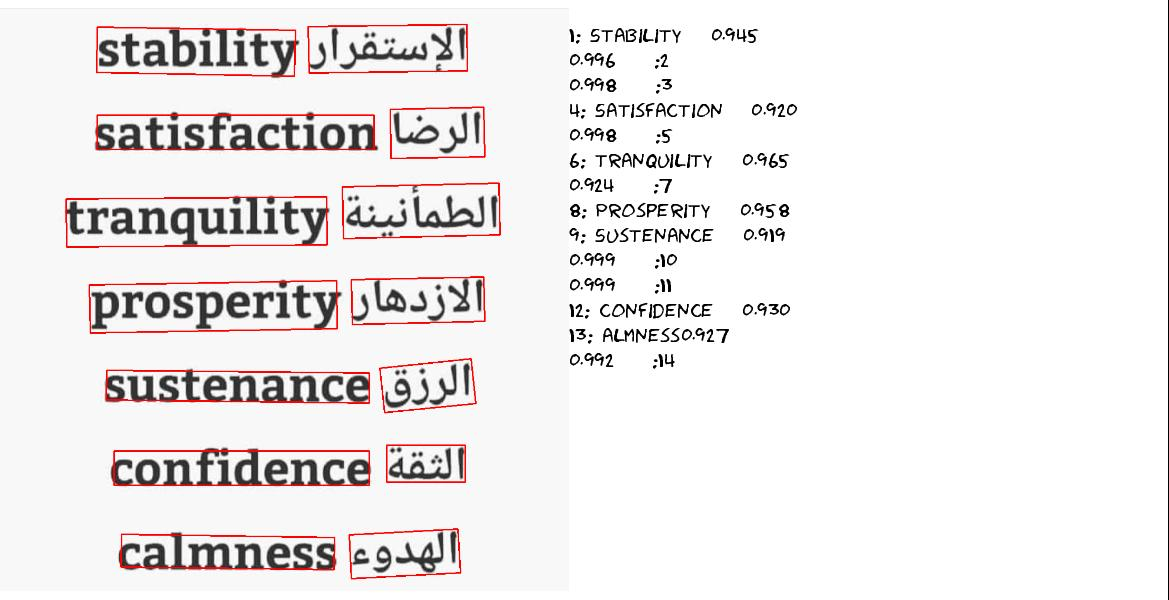

In [ ]:

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/result_ar.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)